In [12]:
import gym
import sys
import numpy as np
import math
import random
import matplotlib.pyplot as plt
from collections import defaultdict, deque
from matplotlib.pyplot import figure

In [6]:
env = gym.make('CliffWalking-v0')
print(env.action_space)
print(env.observation_space)

Discrete(4)
Discrete(48)


Episode 1000/1000

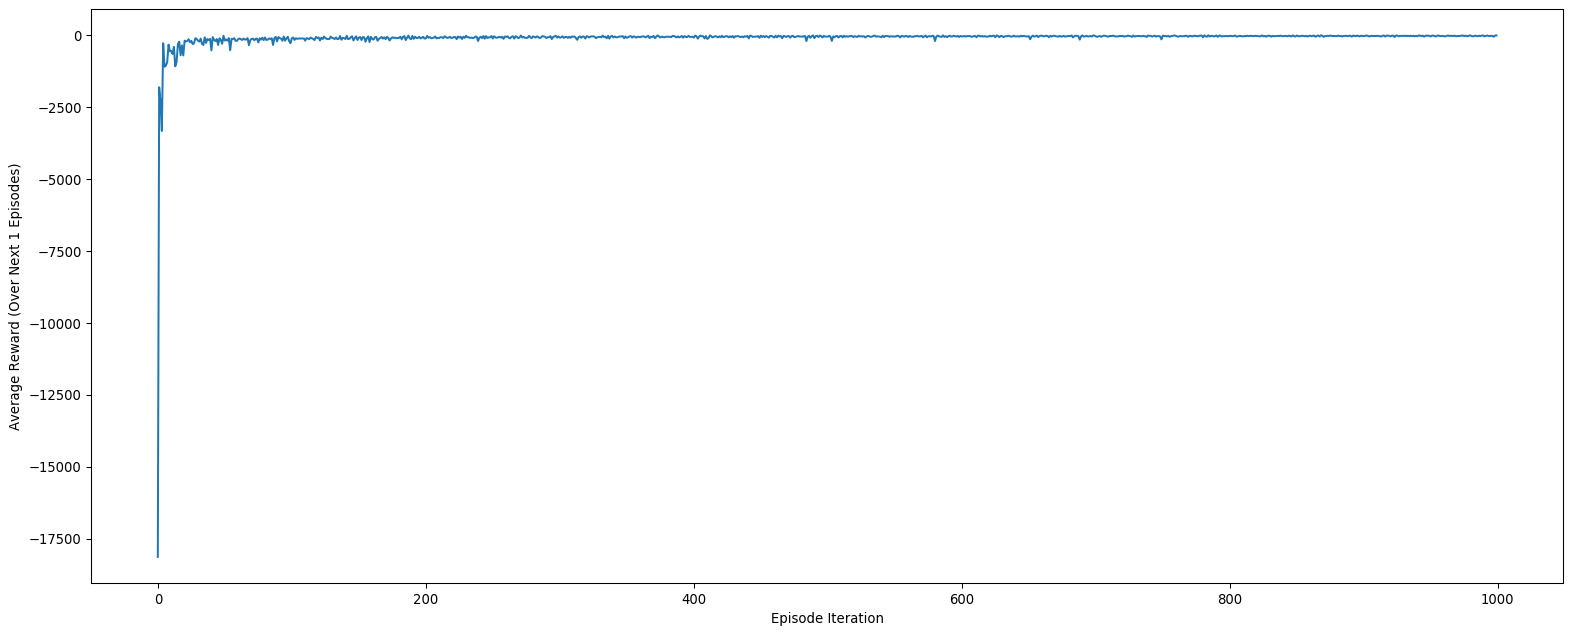

Best Average Reward over 1 Episodes:  -14.0

Estimated Optimal Policy 
[[ 3  2  2  2  2  1  1  2  1  2  0  2]
 [ 2  3  2  2  1  2  2  1  0  1  3  1]
 [ 2  1  0  0  3  1  0  1  0  1  1  2]
 [ 0 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  0]]


In [20]:
# Returns updated Q-value for the most recent experience
def update_Q(alpha, gamma, Q, state, action, reward, next_state=None):
    current = Q[state][action]  
    Qsa_next = np.max(Q[next_state]) if next_state is not None else 0 
    target = reward + (gamma * Qsa_next)            
    new_value = current + (alpha * (target - current)) 
    return new_value


# Epsilon Greedy Action
def epsilon_greedy(Q, state, nA, eps):
    if random.random() > eps:
        return np.argmax(Q[state])
    else:
        return random.choice(np.arange(env.action_space.n))
    
# QLearning for CliffWalking
def q_learning(env, num_episodes, alpha, gamma=1.0, plot_every=1):
    nA = env.action_space.n
    
    # initialize Q randomly, and we now have a table of 0
    Q = defaultdict(lambda: np.zeros(nA))
    
    tmp_scores = deque(maxlen=plot_every)    
    avg_scores = deque(maxlen=num_episodes)
    
    for i_episode in range(1, num_episodes+1):
        if i_episode % 100 == 0:
            print("\rEpisode {}/{}".format(i_episode, num_episodes), end="")
            sys.stdout.flush()
        score = 0       
        state = env.reset()                           
        eps = 1.0 / i_episode
        
        
        while True:
            # choose action
            action = epsilon_greedy(Q, state, nA, eps)   
            # do the action
            next_state, reward, done, info = env.step(action) 
            score += reward 
            #update the Q values
            Q[state][action] = update_Q(alpha, gamma, Q, \
                                                 state, action, reward, next_state)  
            #update the stae
            state = next_state     
            if done:
                tmp_scores.append(score)      
                break
        if (i_episode % plot_every == 0):
            avg_scores.append(np.mean(tmp_scores))
            
    figure(num=None, figsize=(20, 8), dpi=95)        
    plt.plot(np.linspace(0,num_episodes,len(avg_scores),endpoint=False), np.asarray(avg_scores))
    plt.xlabel('Episode Iteration')
    plt.ylabel('Average Reward (Over Next %d Episodes)' % plot_every)
    plt.show()
    # print best 100-episode performance
    print(('Best Average Reward over %d Episodes: ' % plot_every), np.max(avg_scores))
    return Q


# Obtain optimal policy and action value
Q_LearningMax = q_learning(env, 1000, .01)

# print the estimated optimal policy
max_policy = np.array([np.argmax(Q_LearningMax[key]) if key in Q_LearningMax else -1 for key in np.arange(48)]).reshape((4,12))
#(UP = 0, RIGHT = 1, DOWN = 2, LEFT = 3, N/A = -1)
print("\nEstimated Optimal Policy ")
print(max_policy)